In [1]:
#Workbench imports
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.optimize import brentq

from workbench_version import * #load the model

In [2]:
#### LOAD ADAPTATION STRATEGIES ####
from mayors import *
allMayors = [Kroket(),Economicus(),Sentiment(),Lawkeeper()]

In [9]:
from ema_workbench import(RealParameter,ScalarOutcome, Constant, BooleanParameter, CategoricalParameter, IntegerParameter,
                          Model)

model = Model('Rotty',function=run_model_workbench)

model.uncertainties = [CategoricalParameter('RCP',categories=['RCP26','RCP85']),
                       BooleanParameter('collapse'),
                       CategoricalParameter('PDF',categories=[17,50,83]),
                       IntegerParameter('transient',lower_bound=0,upper_bound=19)]


model.levers = [CategoricalParameter('Mayor',categories=allMayors)]

model.outcomes = [ScalarOutcome('Area_A_trust_2120'),
                  ScalarOutcome('Area_A_FPL2100to2120'),
                  ScalarOutcome('Area_B_trust_2120'),
                  ScalarOutcome('Area_B_FPL2100to2120')]

In [12]:
from ema_workbench import(ema_logging, perform_experiments)

ema_logging.log_to_stderr(ema_logging.INFO)

experiments, outcomes = perform_experiments(models=model,scenarios=1000,policies=4)

[MainProcess/INFO] performing 1000 scenarios * 4 policies * 1 model(s) = 4000 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 1200 cases completed
[MainProcess/INFO] 1600 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] 2400 cases completed
[MainProcess/INFO] 2800 cases completed
[MainProcess/INFO] 3200 cases completed
[MainProcess/INFO] 3600 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] experiments finished


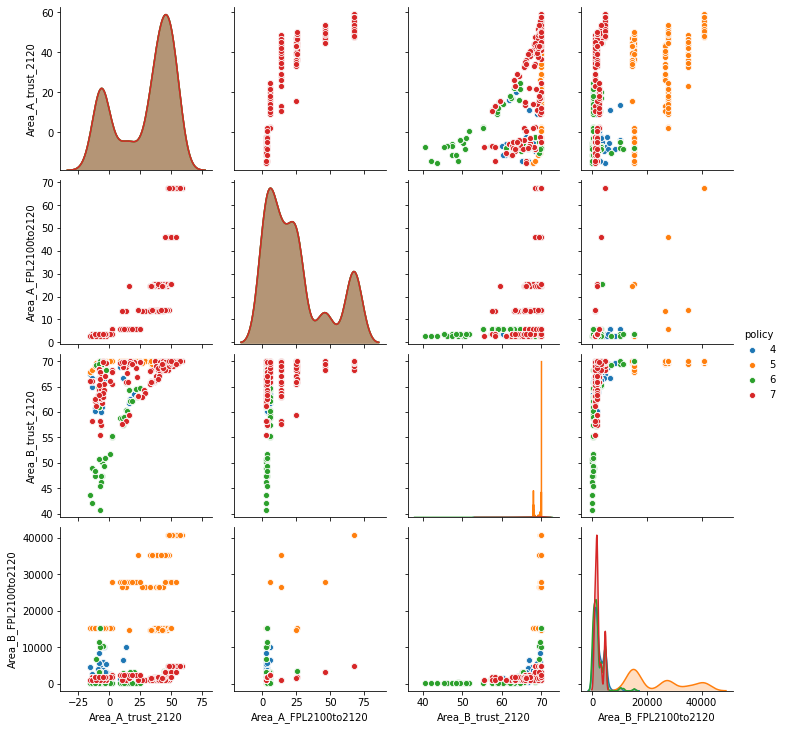

In [13]:
policies = experiments['policy']
for i, policy in enumerate(np.unique(policies)):
    experiments.loc[policies==policy, 'policy'] = str(i)

data = pd.DataFrame(outcomes)
data['policy'] = policies


sns.pairplot(data, hue='policy', vars=list(outcomes.keys()))
plt.show()

In [16]:
experiments.Mayor.unique()

array([<mayors.Sentiment object at 0x000001323994E040>,
       <mayors.Economicus object at 0x000001323994E0A0>], dtype=object)

In [91]:
experiments2 = experiments.copy()
experiments2['SLR']=  experiments2['RCP'] + "_" + experiments2['collapse'].map(str) + "_"  + experiments2['PDF'].map(str)
experiments2

,PDF,RCP,collapse,transient,Mayor,scenario,policy,model,SLR
0,50,RCP85,True,14.0,Sentiment,100,0,Rotty,RCP85_True_50
1,17,RCP85,True,19.0,Sentiment,101,0,Rotty,RCP85_True_17
2,17,RCP26,False,12.0,Sentiment,102,0,Rotty,RCP26_False_17
3,17,RCP26,False,4.0,Sentiment,103,0,Rotty,RCP26_False_17
4,17,RCP85,True,8.0,Sentiment,104,0,Rotty,RCP85_True_17
...,...,...,...,...,...,...,...,...,...
3995,17,RCP26,True,14.0,H. Economicus,1095,3,Rotty,RCP26_True_17
3996,50,RCP26,False,4.0,H. Economicus,1096,3,Rotty,RCP26_False_50
3997,17,RCP26,False,9.0,H. Economicus,1097,3,Rotty,RCP26_False_17
3998,50,RCP85,False,0.0,H. Economicus,1098,3,Rotty,RCP85_False_50


In [92]:
slr_scenarios = experiments2['SLR']
#unique = np.unique(slr_scenarios)
#for i, slr in enumerate(unique):
#     experiments2.loc[slr_scenarios==slr, 'SLR'] = str(i) #replace  by integer
data = pd.DataFrame(outcomes)
data['slr_scenarios'] = slr_scenarios
#data['slr_scenarios']
data.iloc[:,4]

0        RCP85_True_50
1        RCP85_True_17
2       RCP26_False_17
3       RCP26_False_17
4        RCP85_True_17
             ...      
3995     RCP26_True_17
3996    RCP26_False_50
3997    RCP26_False_17
3998    RCP85_False_50
3999     RCP26_True_50
Name: slr_scenarios, Length: 4000, dtype: object

In [98]:
data.sort_values(by='slr_scenarios',inplace=True)

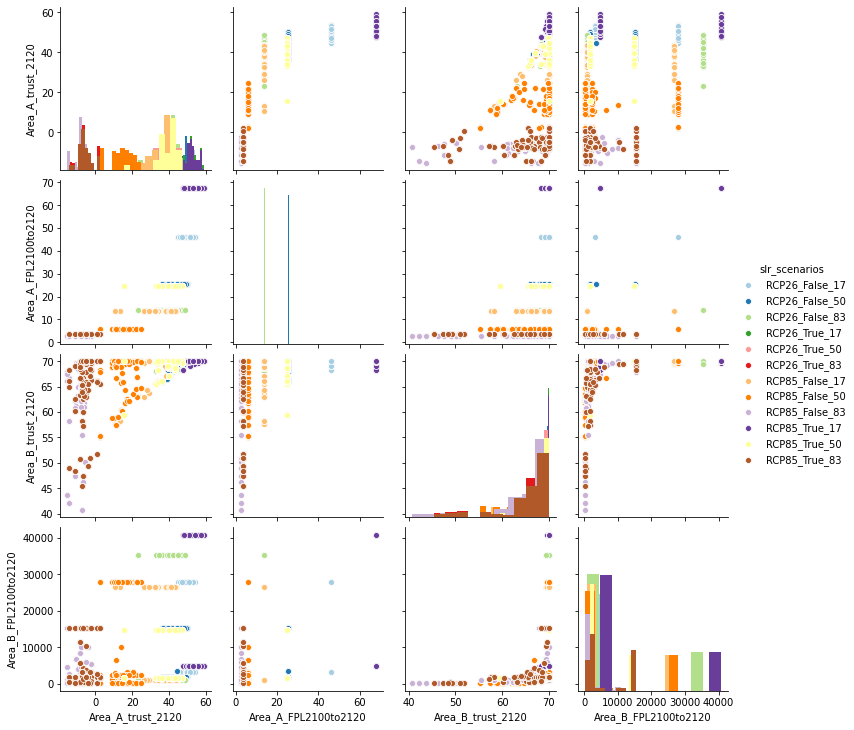

In [104]:
sns.pairplot(data, hue='slr_scenarios',vars=list(outcomes.keys()),diag_kind='hist',palette='Paired')

In [ ]:
for i, policy in enumerate(np.unique(policies)):
    experiments.loc[policies==policy, 'policy'] = str(i)

data = pd.DataFrame(outcomes)
data['policy'] = policies


sns.pairplot(data, hue='policy', vars=list(outcomes.keys()))
plt.show()

[MainProcess/INFO] no time dimension found in results


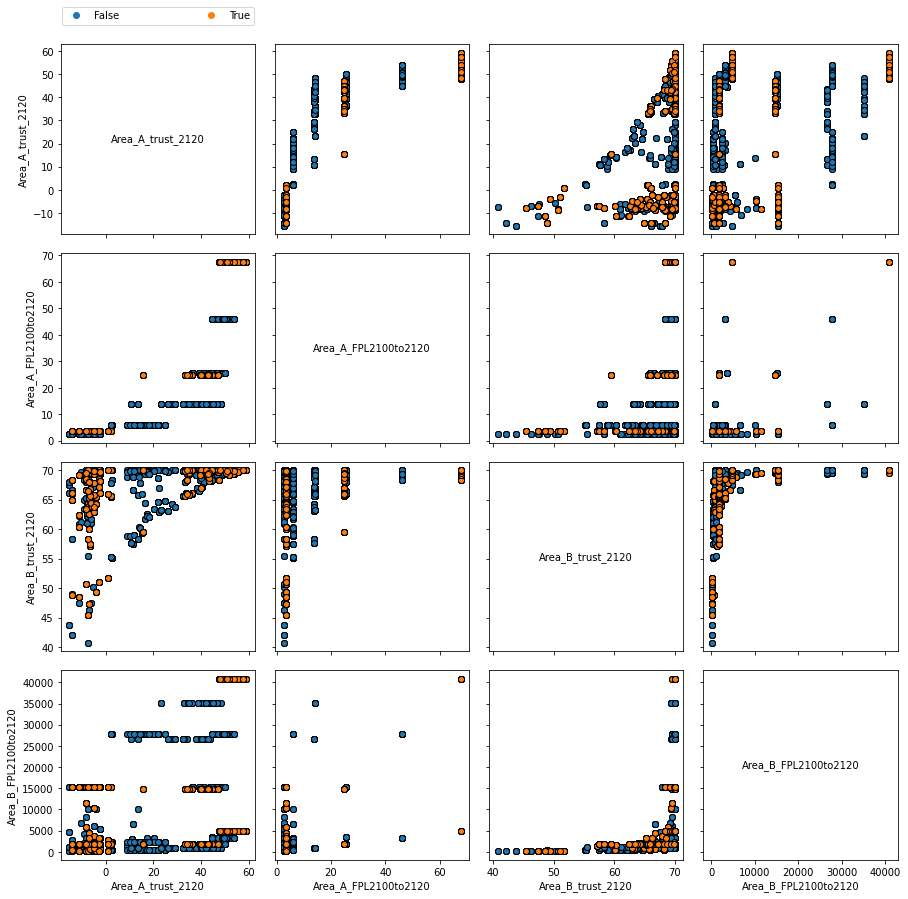

In [28]:
from ema_workbench.analysis import pairs_plotting

fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by='collapse',
                                         legend=True)
fig.set_size_inches(15,15)
plt.show()

In [22]:
outcomes

{'Area_A_trust_2120': array([45.08716481, 55.53645285, 51.64224843, ..., 53.90578306,
        11.96904438, 34.07296084]),
 'Area_A_FPL2100to2120': array([24.76569913, 67.62419361, 46.17610852, ..., 46.17610852,
         5.92469669, 24.76569913]),
 'Area_B_trust_2120': array([69.92675009, 69.64431336, 69.1611392 , ..., 69.45103983,
        69.81192545, 65.99996165]),
 'Area_B_FPL2100to2120': array([1741.85920216, 4818.09541286, 3278.66657571, ..., 3278.66657571,
        2403.91616273, 1741.85920216])}

In [26]:
from ema_workbench.analysis import feature_scoring
x = experiments
y = outcomes



AttributeError: module 'ema_workbench.analysis.feature_scoring' has no attribute 'CLASSIFICATION'